In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from researchlib.single_import import *

# 1. Binary Linear Model

In [6]:
model = builder([
    layer.Reshape((-1, 784)),
    layer.BinarizeLinear(784, 512),
    nn.BatchNorm1d(512),
    nn.Hardtanh(),
    layer.BinarizeLinear(512, 256),
    nn.BatchNorm1d(256),
    nn.Hardtanh(),
    layer.BinarizeLinear(256, 128),
    nn.BatchNorm1d(128),
    nn.Hardtanh(),
    layer.BinarizeLinear(128, 10),
    nn.LogSoftmax(-1),
])

In [7]:
train_loader = VisionDataset(vision.MNIST, batch_size=128, train=True)
test_loader = VisionDataset(vision.MNIST, batch_size=128, train=False)

In [8]:
runner = Runner(model, train_loader, test_loader, 'adam', 'nll', monitor_state='matrix', monitor_mode='max')

In [9]:
runner.init_model()

Init xavier_normal: _BinarizeLinear(in_features=784, out_features=512, bias=True)
Init xavier_normal: _BinarizeLinear(in_features=512, out_features=256, bias=True)
Init xavier_normal: _BinarizeLinear(in_features=256, out_features=128, bias=True)
Init xavier_normal: _BinarizeLinear(in_features=128, out_features=10, bias=True)
Init xavier_normal: Sequential(
  (0): _Reshape()
  (1): _BinarizeLinear(in_features=784, out_features=512, bias=True)
  (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Hardtanh(min_val=-1.0, max_val=1.0)
  (4): _BinarizeLinear(in_features=512, out_features=256, bias=True)
  (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Hardtanh(min_val=-1.0, max_val=1.0)
  (7): _BinarizeLinear(in_features=256, out_features=128, bias=True)
  (8): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): Hardtanh(min_val=-1.0, max_val=1.0)
  (10): _BinarizeLinear

In [17]:
runner.fit(4, 1e-2, callbacks=[Binarized()])

  Epochs    train_loss    train_acc      val_loss      val_acc    
    1*        6.9555        0.8421        2.8342        0.9312    


    2*        1.6866        0.9602        0.6558        0.9805    


    3         1.5880        0.9636        1.5150        0.9642    


    4         1.4213        0.9694        0.7400        0.9804    



In [18]:
runner.load('checkpoint.h5')
runner.validate()

0.655822230290763 tensor(0.9805, device='cuda:0')


0.655822230290763 tensor(0.9805, device='cuda:0')


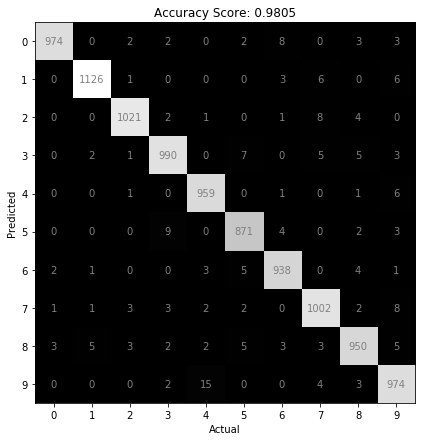

In [19]:
runner.validate(metrics=[ConfusionMatrix(classes=10, plot=True)])

# 2. Binary Convolution Model

In [10]:
model = builder([
    layer.BinarizeConv2d(1, 64, 5),
    nn.BatchNorm2d(64),
    nn.Hardtanh(),
    nn.MaxPool2d(2),
    layer.BinarizeConv2d(64, 128, 5),
    nn.BatchNorm2d(128),
    nn.Hardtanh(),
    nn.MaxPool2d(2),
    layer.Flatten(),
    layer.BinarizeLinear(2048, 10),
    nn.LogSoftmax(-1)
])

In [11]:
runner = Runner(model, train_loader, test_loader, 'adam', 'nll', monitor_state='matrix', monitor_mode='max')

In [12]:
runner.init_model()

Init xavier_normal: _BinarizeConv2d(1, 64, kernel_size=(5, 5), stride=(1, 1))
Init xavier_normal: _BinarizeConv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
Init xavier_normal: _BinarizeLinear(in_features=2048, out_features=10, bias=True)
Init xavier_normal: Sequential(
  (0): _BinarizeConv2d(1, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Hardtanh(min_val=-1.0, max_val=1.0)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): _BinarizeConv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Hardtanh(min_val=-1.0, max_val=1.0)
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): _Flatten()
  (9): _BinarizeLinear(in_features=2048, out_features=10, bias=True)
  (10): LogSoftmax()
)
Init xavier_normal: Sequential(
  (0): _BinarizeConv2d(1, 64,

In [13]:
runner.fit(4, 1e-2, callbacks=[Binarized()])

  Epochs    train_loss    train_acc      val_loss      val_acc    
    1*        5.5645        0.8662        4.6069        0.9187    


    2*        2.6269        0.9542        1.1164        0.9764    


    3         2.0489        0.9606        2.8323        0.9442    


    4*        1.7426        0.9676        0.8696        0.9805    



In [17]:
model[0].weight

Parameter containing:
tensor([[[[ 1.,  1., -1., -1., -1.],
          [ 1.,  1.,  1.,  1., -1.],
          [ 1.,  1.,  1.,  1., -1.],
          [ 1.,  1.,  1.,  1.,  1.],
          [-1., -1.,  1.,  1.,  1.]]],


        [[[-1., -1.,  1.,  1., -1.],
          [ 1.,  1.,  1., -1., -1.],
          [ 1.,  1.,  1., -1., -1.],
          [ 1., -1., -1.,  1.,  1.],
          [-1., -1., -1.,  1.,  1.]]],


        [[[ 1.,  1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.,  1.],
          [ 1., -1.,  1.,  1.,  1.],
          [ 1., -1.,  1.,  1.,  1.]]],


        ...,


        [[[ 1.,  1.,  1.,  1.,  1.],
          [-1., -1., -1., -1.,  1.],
          [-1., -1., -1., -1., -1.],
          [-1., -1., -1., -1., -1.],
          [ 1.,  1.,  1.,  1.,  1.]]],


        [[[ 1.,  1.,  1., -1., -1.],
          [ 1.,  1., -1., -1., -1.],
          [ 1., -1., -1., -1., -1.],
          [ 1., -1., -1., -1., -1.],
          [ 1.,  1.,  1., -1., -1.]]],


        [[[ 1.,  1

0.7713894172559811 tensor(0.9834, device='cuda:0')


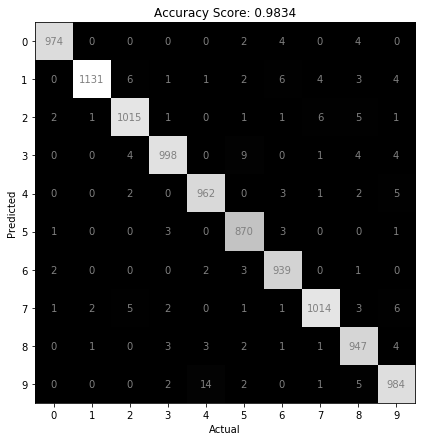

In [25]:
runner.validate(metrics=[ConfusionMatrix(classes=10, plot=True)])